In [109]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak

In [110]:
filename = "/data/xenon/acolijn/G4FastSim/fast/fastsim.root"
#filename = "/data/xenon/acolijn/G4FastSim/standard/standard.root"

file = uproot.open(filename)
gp = file["diff_xsec"]
ev = file["ev"].arrays()

In [111]:
cost=gp["cost"].array()
ff=gp["ff"].array()
mat=gp["mat"].array()
kn=gp["kn"].array()
z=gp["Z"].array()

# print unique values from mat array
print(np.unique(mat))


['Ar', 'C', 'Cr', 'F', 'Fe', 'H', 'N', 'Ni', 'O', 'Xe']


In [112]:
def plot_klein_nishina(material, ax, normalize=True):
    cut = (mat == material)
    y_values_z = kn[cut] * z[cut]
    y_values_ff = kn[cut] * ff[cut]

    if normalize:
        area_z = np.trapz(y_values_z, cost[cut])
        area_ff = np.trapz(y_values_ff, cost[cut])
        y_values_z = y_values_z / area_z  # Changed from /= to =
        y_values_ff = y_values_ff / area_ff  # Changed from /= to =

    ax.plot(cost[cut], y_values_z, linestyle='-', color="black", label='z factor')
    ax.plot(cost[cut], y_values_ff, linestyle='--', color="blue", label='ff factor')
    ax.set_xlabel("cos($\\theta$)")
    ax.set_ylabel("Normalized d$\sigma$/d$\Omega$ (a.u.)")
    ax.legend()

def plot_hist(ax, file, normalize=True):
    h = file['cost']
    bin_contents = h.values()
    bin_edges = h.axis().edges()
    bin_widths = np.diff(bin_edges)

    if normalize:
        area_hist = np.sum(bin_contents * bin_widths)
        bin_contents = bin_contents / area_hist  # Changed from /= to =

    ax.hist(bin_edges[:-1], bins=bin_edges, weights=bin_contents, histtype='step', edgecolor='red', label='Histogram')
    ax.set_xlabel('$\\cos(\\theta)$')
    ax.set_ylabel('Normalized $dN / d\\cos(\\theta)$')
    ax.set_title('Compton scatter angles for Xe')
    ax.grid(True)
    ax.legend()




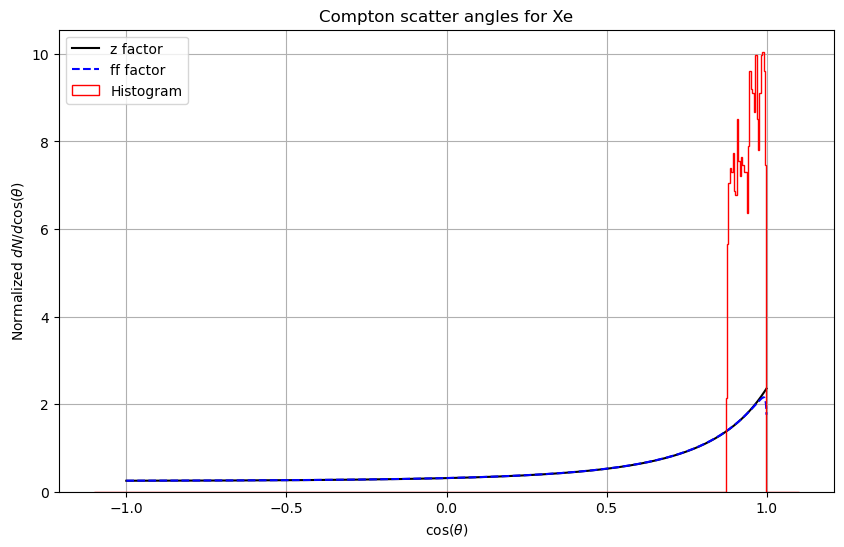

In [113]:

# Example usage:
fig, ax = plt.subplots(figsize=(10, 6))
plot_klein_nishina('Xe', ax)
plot_hist(ax, file)
plt.show()